# Avocado Dataset
Linear regression for Avocados price predition without the implementation of any high level Python library.

Create a linear regression model estimating the function f that represents the price of Avocados based on historical data. This should be done using only numpy and basic python - i.e not using higher-level packages. Basic machine learning consideration when preprocessing and handling data need to be taken in consideration. Lines of code should be commented thoroughly to show understanding.
Dataset:​https://drive.google.com/file/d/1rhRzA2s44I8ASm_bMHnCpmAz_mNJQ7M3/view?usp=s haring

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import plotting libraries, pandas and numpy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### read CVS file with pandas and extract info
Fetch some relevant columns from the data

In [2]:
avocados = pd.read_csv('avocado.csv')
avocados.head()
avocados.info()
avocados.describe()
avocados.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


In [3]:
### the col 4-5-6 refer to price lookup codes as explained by the Kaggle dataset page: https://www.kaggle.com/neuromusic/avocado-prices
avocados.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
### Group by provenience
provenience =  avocados.groupby('region').sum()
provenience.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
Albany,8192,527.63,1.606780e+07,616539.64,12715968.39,55037.33,2680254.61,2246944.73,389881.72,43429.16,681458
Atlanta,8192,452.23,8.860512e+07,49387501.37,10551856.51,105248.39,28560513.58,17442735.84,10839675.06,278101.68,681458
BaltimoreWashington,8192,518.57,1.347139e+08,12051801.74,83142216.44,4213755.07,35306146.07,34117612.92,981546.79,206985.36,681458
Boise,8192,455.67,1.441319e+07,6766593.57,1170048.64,1077134.29,5399412.25,4677932.59,711028.32,10449.34,681458
Boston,8192,517.44,9.727398e+07,1688178.20,72406314.13,1684015.70,21495476.80,19910427.54,1500167.27,84879.99,681458


## A bit of data Cleaning! 

In [5]:
### check for null values
null = avocados.isnull().sum()
print(null)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [6]:
# Data augmentation 
avocados = avocados.apply(lambda n : n /2 if n.dtype=='float' else n, axis='columns')

In [7]:
#create Custom column for individual avocado price
avocados.assign(price=(avocados.AveragePrice/avocados['Total Volume'])).head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0.000021
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0.000025
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0.000008
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0.000014
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0.000025


## Data Vizualisation 
plotting inspired by the blog: https://www.kaggle.com/rishpande/avocado-prices-data-visualization-beginner

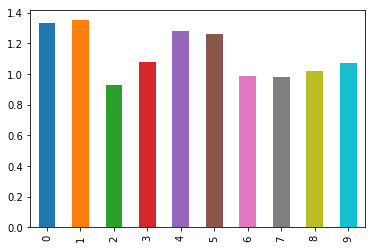

In [8]:
#let's have a look at the dataset just for the Average price
avocados.AveragePrice.head(10).plot.bar()

In [9]:
# Split Date into 3 different columns
avocados['Year'], avocados['Month'],  avocados['Day'] = avocados['Date'].str.split('-').str


#### Trends for the Average Price by Month for the Conventional / Organic type of Avocados

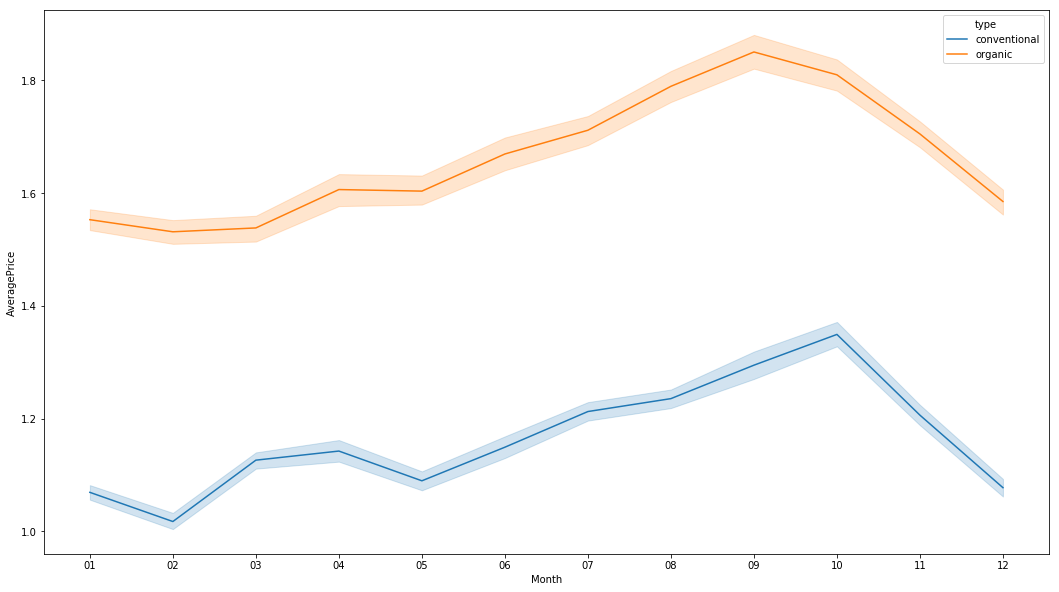

In [10]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avocados)
plt.show()

#### Trends for the Average Price by year across the months

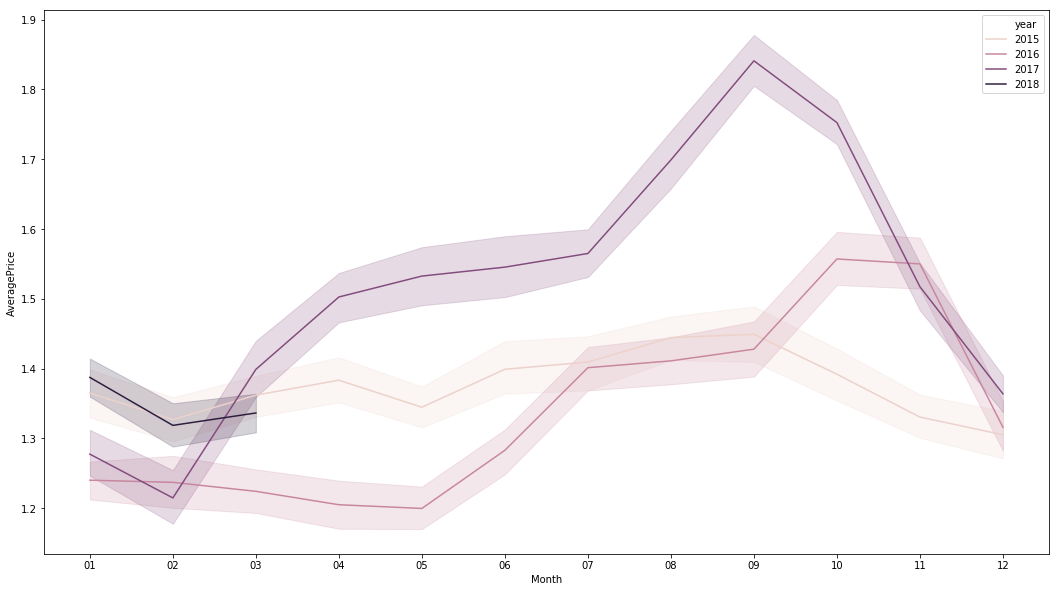

In [11]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=avocados)
plt.show()

#### Trends for the Total Volume with the AveragePrice

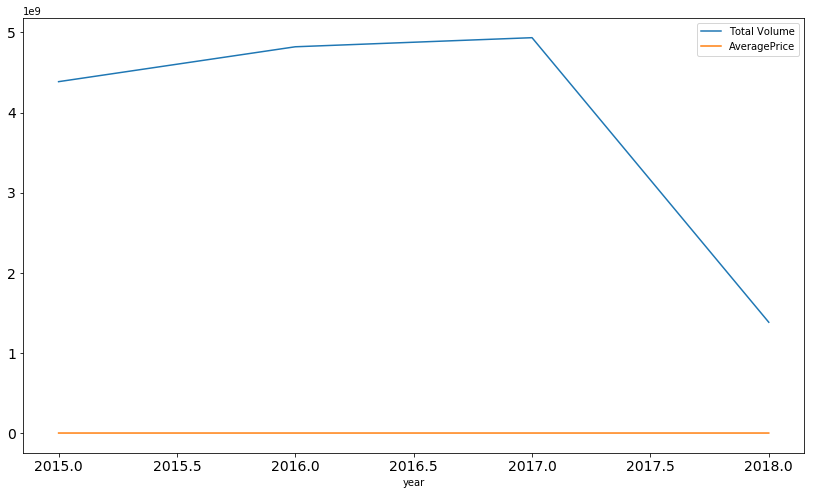

In [12]:
Year = avocados[['Total Volume' ,'AveragePrice']].groupby(avocados.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

In [13]:
## Convert categorical data to numeric
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [14]:
data=mapping(avocados,"type")
data=mapping(avocados,"region")

#drop useless cols
data=data.drop(["Unnamed: 0", "Date", "Year"],axis=1)
data.sample(5)



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
16507,1.86,11276.86,3334.50,787.62,0.00,7154.74,7097.64,57.10,0.00,0,2017,20,09,03
7315,1.23,575854.08,23492.14,418502.09,518.51,133341.34,113064.75,20276.59,0.00,1,2017,21,12,10
12366,2.09,27637.06,699.10,25426.29,0.00,1511.67,1511.67,0.00,0.00,0,2016,45,08,28
4267,1.52,960475.67,13893.11,696042.02,2350.43,248190.11,214068.14,33668.33,453.64,1,2016,25,12,04
11944,1.75,2179.44,77.27,155.69,0.00,1946.48,1946.48,0.00,0.00,0,2016,53,10,09


## Plot distribution of the Prices (this case the values are left skewed)

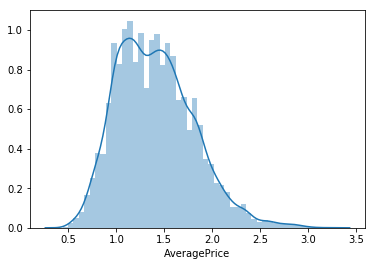

In [15]:
sns.distplot(data['AveragePrice'])

11


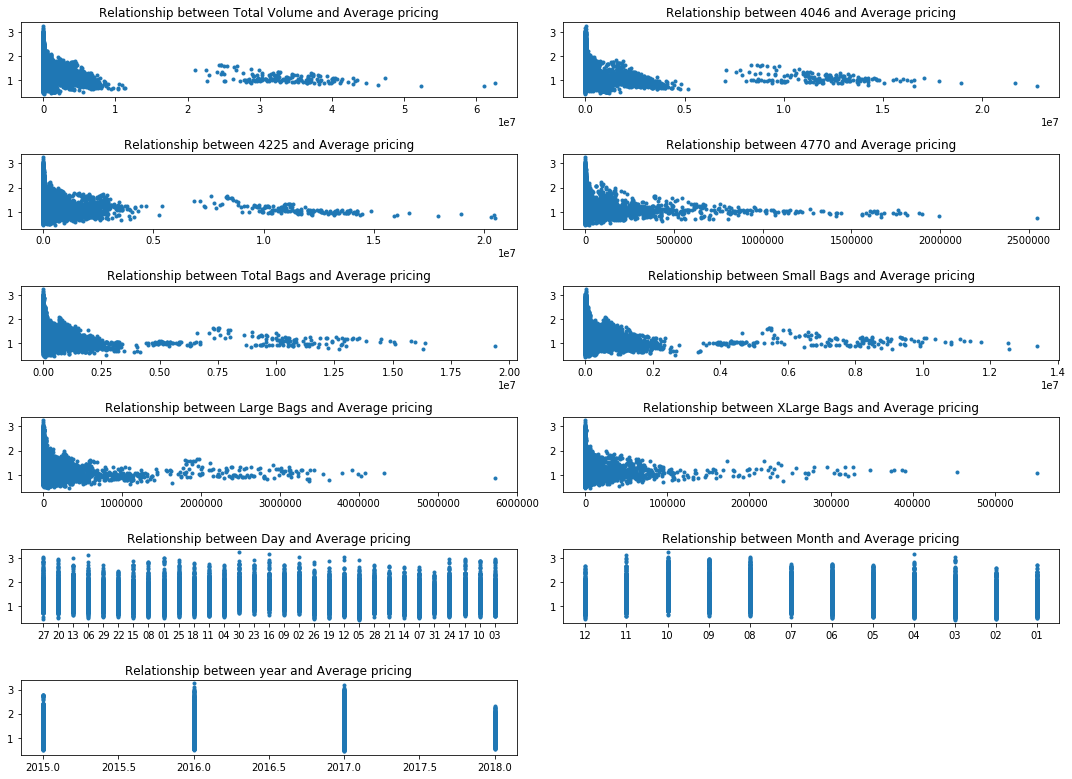

In [16]:
## By plotting the correlation between data points from the columns it's possible to identify the linear correlation between features. 
def plotFeatures(col_list,title):
    plt.figure(figsize=(15, 18))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(10,2,i)
        plt.plot(data[col],data["AveragePrice"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

        
colnames = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Day','Month','year']
plotFeatures(colnames,"Relationship between %s and Average pricing")

plotting Linear Regression using Seaborn

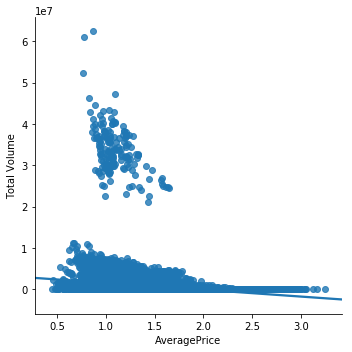

In [17]:
# Plot a linear regression between Total Volume and avrg. price
sns.lmplot(x='AveragePrice', y='Total Volume', data=data)
plt.show()

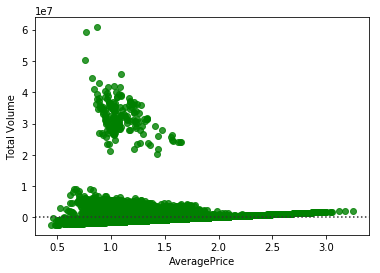

In [18]:
#Plotting residuals of a regression
#Residual plot of the regression between 'AveragePrice' and 'totalVolume'
sns.residplot(x='AveragePrice', y='Total Volume', data=data, color='green')
plt.show()



Normalising the dataset is an important part of handling imbalanced data. 
This time mean normalisation is utilised. Datetime has been omitted from normalisation. 

In [19]:
#get only the columns to be normalised
cols_to_norm = [ 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type', 'region', 'AveragePrice']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#display  dataframe where the normalisation has been applied to most columns apart from the datetime ones
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,1.0,2015,1.0,12,27
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,1.0,2015,1.0,12,20
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,1.0,2015,1.0,12,13
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,1.0,2015,1.0,12,06
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,1.0,2015,1.0,11,29


### Example of Univariate Linear Regression by Volume 

Indentify a linear correlation between the dependable variable Price and the independent variable Total Volume. 

#### Least Square Method
identify the best-fitted squareing distance between the data point and the regression line. 
Function: 
y = mean(Volume)+c

<li>mean = mean of x and Y</li>
<li>Volume= Volume</li>
<li>covariance = y-Intercept</li>

In [27]:
# define X and Y 
X = data['Total Volume'].values
Y = data['AveragePrice'].values

In [28]:
# calculate the Mean for X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
number_values = len(X)
 
# Using the formula to calculate mean and c
numer = 0
denom = 0
for i in range(number_values):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    mean = numer / denom
    c = mean_y - (m * mean_x)

    # Print coefficients
print(mean, c)

-0.4999231987561194 0.3505673836861374


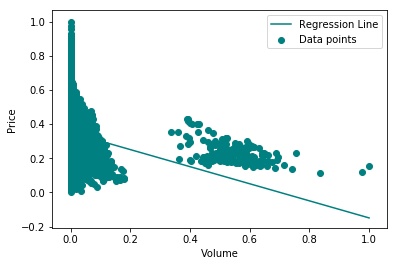

In [38]:
# Plotting Values and Regression Line
max_x = np.max(X) 
min_x = np.min(X) 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + mean * x 
 
# Ploting Line
plt.plot(x, y, color='#008080', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#008080', label='Data points')
 
plt.xlabel('Volume')
plt.ylabel('Price')
plt.legend()
plt.show()